In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os
parent = os.path.dirname(os.path.abspath(''))

In [3]:
file = os.path.join(parent,'samples','trajectory.processed','t.noised_trajectory.npz')
data = np.load(file)
X,Y = data.values()

X = (X-np.mean(X,axis=(0,1)))/np.std(X,axis=(0,1))
X = X[:,:100,:]

target_mean,target_std = np.mean(Y,axis=0),np.std(Y,axis=0)
Y = (Y-target_mean)/target_std
Y = np.repeat(Y[:,np.newaxis,:],100,1)

In [5]:
model = tf.keras.models.load_model(os.path.join(parent,'model_dagger.h5'))

In [6]:
predicted = model.predict(X)
dist = np.linalg.norm(predicted-Y,axis=2)

In [16]:
std = np.std(dist,axis=(0,1))
dist /= std

In [14]:
dist *= std

Text(0, 0.5, 'timestep')

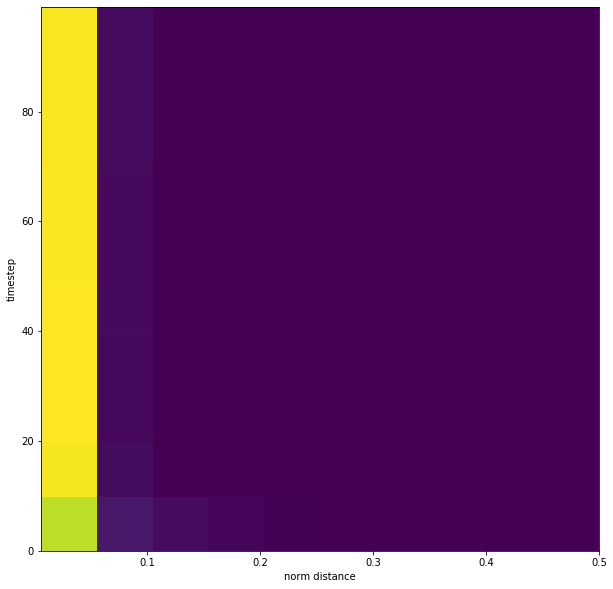

In [19]:
fig,axs = plt.subplots(1,1,figsize=(10,10))

hist0,xedges0,yedges0 = np.histogram2d(dist.flatten(),list(range(100))*len(dist))
extent0 = [xedges0[0], .5, yedges0[0], yedges0[-1]]
im0 = axs.imshow(hist0.T, extent=extent0, origin='lower',aspect='auto')
axs.set_xlabel("norm distance")
axs.set_ylabel("timestep")